<a href="https://colab.research.google.com/github/rkmishracs/Machine-Learning-Projects/blob/main/InvestmentAnalysis/Investments_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ram Krishn Mishra



# **importing Required Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# set seaborn theme if you prefer
sns.set(style="white")

# **Reading companies_df.txt, rounds2_df.csv and mapping.csv files**

In [ ]:
companies_df = pd.read_csv("/content/drive/My Drive/Upgrad/companies.txt", sep="\t", encoding = "unicode_escape")
rounds2_df = pd.read_csv("/content/drive/My Drive/Upgrad/rounds2.csv",encoding='unicode_escape')
mapping = pd.read_csv("/content/drive/My Drive/Upgrad/mapping.csv", encoding = "unicode_escape")

# Converting column permalink to lowercase and count unique companies_df_df

In [ ]:
companies_df["permalink"] = list(map(lambda x: x.lower(), companies_df["permalink"]))
companies_df["permalink"].nunique()

66368

# Converting column company_permalink to lowercase and count unique companies_df

In [ ]:
rounds2_df["company_permalink"] = list(map(lambda x: x.lower(), rounds2_df["company_permalink"]))
rounds2_df["company_permalink"].nunique()

66370

# Merging the data frames companies_df and round2 using inner join operation

In [ ]:
master_frame=pd.merge(rounds2_df,companies_df,how="inner",left_on="company_permalink",right_on="permalink")

In [ ]:
master_frame.shape

(114942, 16)

#Cleaning and  Filling the Missing values

In [ ]:
# column wise missing value count
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

In [ ]:
# Percentage of total number of null values as per column wise
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

# raised_amount_usd null values are 17.39% dropping it for further analysis

In [ ]:
master_frame['raised_amount_usd'].isnull().sum()

19984

In [ ]:
master_frame=master_frame[~master_frame.raised_amount_usd.isnull()]

In [ ]:
master_frame['raised_amount_usd'].isnull().sum()

0

In [ ]:
master_frame.shape

(94958, 16)

In [ ]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         70.34
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                4.56
category_list               1.10
status                      0.00
country_code                6.16
state_code                  8.01
region                      7.42
city                        7.42
founded_at                 16.81
dtype: float64

# dropping those column which are not being use for this analysis and having more null values

In [ ]:
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)
master_frame = master_frame.drop('homepage_url', axis=1)

In [ ]:
master_frame=master_frame[~master_frame.country_code.isnull()]

In [ ]:
master_frame=master_frame[~master_frame.category_list.isnull()]

In [ ]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
category_list              0.00
status                     0.00
country_code               0.00
state_code                 1.96
region                     1.34
city                       1.33
dtype: float64

# Analysis Related to Funding 

1.   printing Unique investment type
2.   Applying filter for selected column



In [ ]:
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

In [ ]:
master_frame=master_frame[master_frame['funding_round_type'].isin(['seed','angel','venture','private_equity'])]

In [ ]:
# We can choose aggregate functions mean to get the average funding raised for each funding types
master_by_fundtype = master_frame.groupby('funding_round_type')
master_by_fundtype['raised_amount_usd'].mean().sort_values(ascending = False)

funding_round_type
private_equity    7.393849e+07
venture           1.172422e+07
angel             9.715739e+05
seed              7.477937e+05
Name: raised_amount_usd, dtype: float64

Venture type is the best investing sector and fullfilling  the condition between 5m to 15 m

# Analysis Related to Country




In [ ]:
venture_df = master_frame[master_frame["funding_round_type"]=="venture"]

In [ ]:
venture_df.shape

(47809, 13)

# Finding top 9 countries which have received the highest total funding

In [ ]:
venture_by_country = venture_df.groupby('country_code')
venture_by_country['raised_amount_usd'].sum().sort_values(ascending=False).head(9)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

# Filtering the data with these top 9 countries only.

In [ ]:
top9 = venture_df[venture_df['country_code'].isin(["USA","CHN","GBR","IND","CAN","FRA","ISR","DEU","JPN"])]

# Removing/Cleaning the rows with no category 

In [ ]:
top9=top9[~top9.category_list.isnull()]

### For some companies_df, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |). For example, one of the companies_df’ category_list is Application Platforms|Real Time|Social Network Media.<br>
## <br>
 

In [ ]:
top9['primary_sector'] =top9['category_list'].astype(str).apply(lambda x: x.split('|')[0])

In [ ]:
top9.shape

(44118, 14)

In [ ]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,5/1/2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19/3/2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21/12/2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,9/11/2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,3/1/2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics


# Sector wise Analysis

For further analysis and mapping, removing the null rows from the mapping dataframe.

In [ ]:
mapping=mapping[~mapping.category_list.isnull()]
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


# User Define Function to correct the category_list column of the mapping file.

In [ ]:
def catmap(cat):
    if '0' in cat:
        if cat.startswith("0"):
            return cat[:cat.find('0')]+'Na'+cat[cat.find('0')+1:]
        elif cat.endswith("0"):
            return cat
        else:
            return cat[:cat.find('0')]+'na'+cat[cat.find('0')+1:]
    else:
        return cat

In [ ]:
# calling the custom function to correct the category_list column in the mapping.
mapping['category_list']=list(map(catmap,mapping['category_list']))

###Mapping the category_list in the top9 dataframe to the main_sector in the mapping file. Before merging these two dataframe, creating a new column main_sector in mapping dataframe to get the main sector name of each category.

In [ ]:
m=pd.melt(mapping, id_vars=['category_list'], var_name=['main_sector'])
m=m[m.value==1]
m=m.drop('value',axis=1)
m.shape


(687, 2)

In [ ]:
top9=pd.merge(top9,m,how="left",left_on="primary_sector",right_on="category_list")

In [ ]:
top9=top9.drop('category_list_y',axis=1)

In [ ]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,5/1/2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19/3/2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21/12/2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,9/11/2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,3/1/2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"


In [ ]:
top9['main_sector'].head()

0                              Entertainment
1                 News, Search and Messaging
2                 Cleantech / Semiconductors
3    Social, Finance, Analytics, Advertising
4    Social, Finance, Analytics, Advertising
Name: main_sector, dtype: object

Checking for null in the main_sector column of the merged data frame.

In [ ]:
len(top9[top9['main_sector'].isnull()])

12

There are only 12 rows with missing main_sector values. Hence, removing such rows.

In [ ]:
top9=top9[~(top9['main_sector'].isnull())]

In [ ]:
len(top9[top9['main_sector'].isnull()])

0

In [ ]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,5/1/2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19/3/2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21/12/2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,9/11/2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,3/1/2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"


<br>Creating three separate data frames D1, D2 and D3 for each of the top three countries (USA, GBR, IND) containing the observations of funding type venture falling within the 5-15 million USD range.

# Sector Analysis - USA

In [ ]:
D1=top9[top9['country_code']=='USA']

In [ ]:
D1 = D1[(D1['raised_amount_usd'] >= 5000000) & (D1['raised_amount_usd'] <= 15000000)]

Total amount raised in USA

In [ ]:
D1.raised_amount_usd.sum()

107757097294.0

In [ ]:
D1.raised_amount_usd.count()

12063

In [ ]:
D1.shape

(12063, 15)

Finding the top sectors with the highest number of investments in USA.

In [ ]:
D1_by_sector=D1.groupby('main_sector')

In [ ]:
D1_by_sector['raised_amount_usd'].count().sort_values(ascending = False).head()


main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Name: raised_amount_usd, dtype: int64

In [ ]:
D1_by_sector['raised_amount_usd'].sum().sort_values(ascending = False).head()

main_sector
Others                                     2.632101e+10
Social, Finance, Analytics, Advertising    2.380738e+10
Cleantech / Semiconductors                 2.163343e+10
News, Search and Messaging                 1.397157e+10
Health                                     8.211859e+09
Name: raised_amount_usd, dtype: float64

Finding the highest invested company among the 1st Top sectors of the country.

In [ ]:
D1[D1['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                        
Others       /organization/virtustream            64300000.0
             /organization/capella                54968051.0
             /organization/airtight-networks      54201907.0
             /organization/decarta                52100000.0
             /organization/black-duck-software    51000000.0
Name: raised_amount_usd, dtype: float64

Finding the highest invested company among the 2nd Top sectors of the country.

In [ ]:
D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              permalink                
Social, Finance, Analytics, Advertising  /organization/shotspotter    67933006.0
                                         /organization/demandbase     63000000.0
                                         /organization/intacct        61800000.0
                                         /organization/netbase        60600000.0
                                         /organization/lotame         59700000.0
Name: raised_amount_usd, dtype: float64

#### Sector Analysis - GBR (United Kingdom)

Creating Data frame D2 for country GBR

In [ ]:
D2=top9[top9['country_code']=='GBR']
D2 = D2[(D2['raised_amount_usd'] >= 5000000) & (D2['raised_amount_usd'] <= 15000000)]
D2_by_sector=D2.groupby('main_sector')

Finding the top sectors with the highest number of investments in GBR.

In [ ]:
D2_by_sector['raised_amount_usd'].count().sort_values(ascending = False).head()

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Name: raised_amount_usd, dtype: int64

In [ ]:
D2_by_sector['raised_amount_usd'].sum().sort_values(ascending = False)

main_sector
Others                                     1.283624e+09
Cleantech / Semiconductors                 1.163990e+09
Social, Finance, Analytics, Advertising    1.089404e+09
News, Search and Messaging                 6.157462e+08
Entertainment                              4.827847e+08
Manufacturing                              3.619403e+08
Health                                     2.145375e+08
Automotive & Sports                        1.670516e+08
Name: raised_amount_usd, dtype: float64

Total amount raised in GBR

In [ ]:
D2.raised_amount_usd.sum()

5379078691.0

In [ ]:
D2.raised_amount_usd.count()

621

In [ ]:
D2.shape

(621, 15)

Finding the highest invested company among the 1st Top sectors of the country.

In [ ]:
D2[D2['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                            
Others       /organization/electric-cloud             37000000.0
             /organization/sensage                    36250000.0
             /organization/enigmatic                  32500000.0
             /organization/silverrail-technologies    29000000.0
             /organization/opencloud                  27972766.0
Name: raised_amount_usd, dtype: float64

Finding the highest invested company among the 2nd Top sectors of the country.

In [ ]:
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              permalink                          
Social, Finance, Analytics, Advertising  /organization/celltick-technologies    37500000.0
                                         /organization/mythings                 34000000.0
                                         /organization/zopa                     32900000.0
                                         /organization/imagini                  28550000.0
                                         /organization/marketinvoice            25553007.0
Name: raised_amount_usd, dtype: float64

#### Sector Analysis -  India

Creating Data frame D3 for country IND

In [ ]:
D3=top9[top9['country_code']=='IND']
D3 = D3[(D3['raised_amount_usd'] >= 5000000) & (D3['raised_amount_usd'] <= 15000000)]
D3_by_sector=D3.groupby('main_sector')

Finding the top sectors with the highest number of investments in IND.

In [ ]:
D3_by_sector['raised_amount_usd'].count().sort_values(ascending = False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

In [ ]:
D3_by_sector['raised_amount_usd'].sum().sort_values(ascending = False)

main_sector
Others                                     1.013410e+09
Social, Finance, Analytics, Advertising    5.505496e+08
News, Search and Messaging                 4.338345e+08
Entertainment                              2.808300e+08
Manufacturing                              2.009000e+08
Health                                     1.677400e+08
Cleantech / Semiconductors                 1.653800e+08
Automotive & Sports                        1.369000e+08
Name: raised_amount_usd, dtype: float64

In [ ]:
D3.shape

(328, 15)

Total amount raised in IND

In [ ]:
D3.raised_amount_usd.sum()

2949543602.0

In [ ]:
D3.raised_amount_usd.count()

328

Finding the highest invested company among the 1st Top sectors of the country.

In [ ]:
D3[D3['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                     
Others       /organization/firstcry-com        39000000.0
             /organization/myntra              38000000.0
             /organization/commonfloor         32900000.0
             /organization/pepperfry-com       28000000.0
             /organization/itzcash-card-ltd    25000000.0
Name: raised_amount_usd, dtype: float64

Finding the highest invested company among the 2nd Top sectors of the country.

In [ ]:
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              permalink                               
Social, Finance, Analytics, Advertising  /organization/manthan-systems               50700000.0
                                         /organization/komli-media                   28000000.0
                                         /organization/shopclues-com                 25000000.0
                                         /organization/intarvo                       21900000.0
                                         /organization/grameen-financial-services    21556050.0
Name: raised_amount_usd, dtype: float64

### Checkpoint 6: Plots

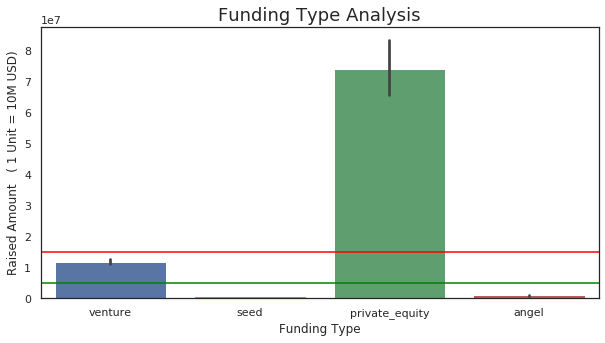

In [ ]:
# bar plot with default statistic=mean
plt.figure(figsize=(10,5))
g=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
#g.set_ylim(0, 20000000)
#g.set_yscale('log')
g.set(xlabel='Funding Type', ylabel='Raised Amount   ( 1 Unit = 10M USD)')
g.set_title('Funding Type Analysis',fontsize =18)

plt.axhline(5000000, color='green')
plt.axhline(15000000, color='red')


plt.show()

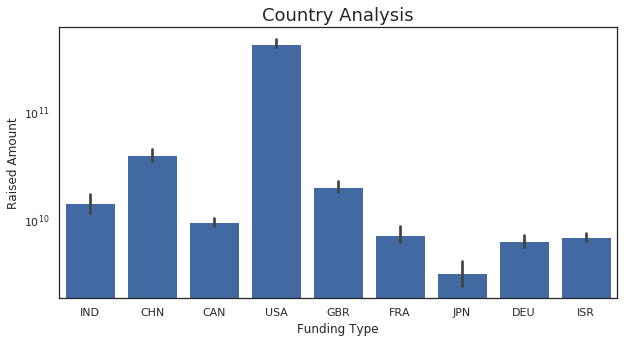

In [ ]:
# bar plot with default statistic=mean
plt.figure(figsize=(10,5))
c=sns.barplot(x='country_code', y='raised_amount_usd', data=top9, estimator=np.sum,color=(0.2, 0.4, 0.7, 0.6))
c.set_yscale('log')
c.set(xlabel='Funding Type', ylabel='Raised Amount')
c.set_title('Country Analysis',fontsize =18)
plt.show()

A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type i.e venture)

For this plot creating a master dataframe with all the data for the top 3 sectors of the top 3 countries.

In [ ]:
master_D=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]

In [ ]:
master_D.shape

(8014, 15)

In [ ]:
master_D=master_D.append(D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])], ignore_index=True)

In [ ]:
master_D.shape


(8424, 15)

In [ ]:
master_D=master_D.append(D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])], ignore_index=True)

In [ ]:
master_D.shape

(8646, 15)

Using the master_D dataframe to plot the sector wise investment count of the top 3 sectors of the top3 countries.

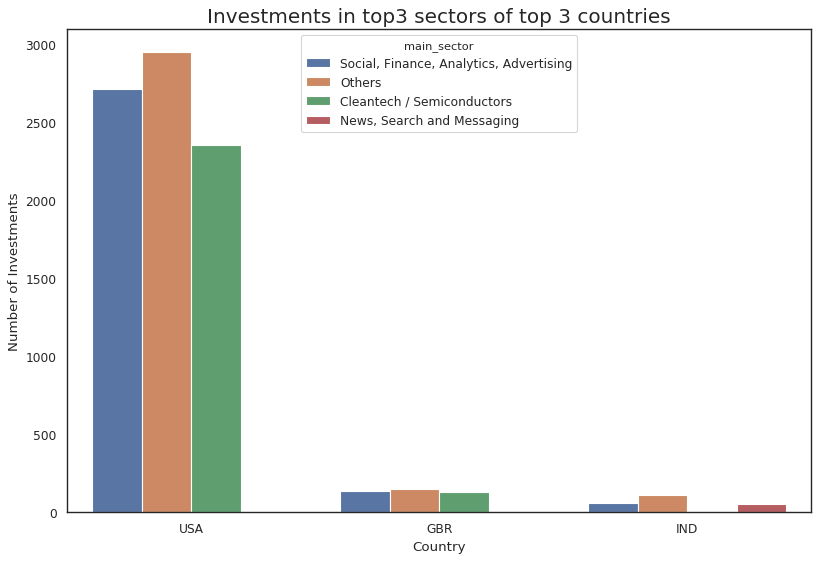

In [ ]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=master_D,estimator=lambda x: len(x))
s.set(xlabel='Country', ylabel='Number of Investments')
s.set_title('Investments in top3 sectors of top 3 countries',fontsize =18)
plt.show()
